# 1. Load dataset

In [1]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import missingno as msno

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("news.xlsx")
df.head()

,Category,Title,News_Article
0,Maraqlı,Naviforce Sport Saat 2016 ilə zövqlərin ahəngi,Naviforce Sport Saat 2016 Yapon Mexanizmi Yapo...
1,Maraqlı,"Sinir ,oynaq , sinir bel ağrılarına 3 gündə son !","ŞOK ! ŞOK ! ŞOK ! Xanımlar və bəylər , bel və ..."
2,Maraqlı,Dəyərindən qat-qat aşağı qiymətə Mənzil,Dəyərindən qat-qat Aşağı Qiymətə. Həzi Aslanov...
3,İdman,2024 və 2028-ci il olimpiadalarının keçiriləcə...,2028-ci il Yay Olimpiya və Paralimpiya Oyunla...
4,Dünya,Türkiyədə zəlzələ,Türkiyədə daha bir zəlzələ meydana gəlib. L...


In [3]:
df["Category"].unique()

array(['Maraqlı', 'İdman', 'Dünya', 'Siyasət', 'İqtisadiyyat',
       'Mədəniyyət'], dtype=object)

In [4]:
from io import StringIO
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

In [5]:
df.isnull().sum().sum()

0

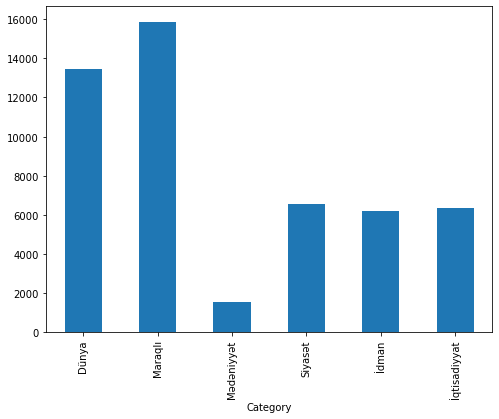

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Category').News_Article.count().plot.bar()
plt.show()

# 2. Data preprocessing

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
tfidf = TfidfVectorizer(sublinear_tf=True, max_features=3000, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df.News_Article).toarray()
labels = df.category_id
features.shape

(50000, 3000)

In [9]:
from sklearn.feature_selection import chi2
import numpy as np

N = 5
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n# '{}':".format(Product))
  print("  - Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  - Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))


# 'Dünya':
  - Most correlated unigrams:
. ri
. azərbaycan
. novosti
. hadisə
. nəfər
  - Most correlated bigrams:
. həlak olub
. trend istinadən
. novosti yə
. baş verib
. ri novosti

# 'Maraqlı':
  - Most correlated unigrams:
. şou
. org
. axşam
. deyerler
. müğənni
  - Most correlated bigrams:
. gettime şou
. şou biznes
. deyerler org
. az axşam
. axşam az

# 'Mədəniyyət':
  - Most correlated unigrams:
. artisti
. əməkdar
. musiqi
. teatr
. mədəniyyət
  - Most correlated bigrams:
. 19 00
. azərbaycan dövlət
. xalq artisti
. və turizm
. mədəniyyət və

# 'Siyasət':
  - Most correlated unigrams:
. atət
. dağlıq
. azərbaycan
. ermənistan
. lham
  - Most correlated bigrams:
. prezident lham
. azərbaycan prezidenti
. dağlıq qarabağ
. prezidenti lham
. lham əliyev

# 'İdman':
  - Most correlated unigrams:
. qol
. apasport
. futbol
. liqasının
. çempionlar
  - Most correlated bigrams:
. çempionlar liqasının
. az goal
. baş məşqçisi
. goal az
. apasport az

# 'İqtisadiyyat':
  - Most correl

In [10]:
df.iloc[1342]['News_Article']

' Türkiyənin “Beşiktaş” klubu Hollandiya yığmasının futbolçusu Cermeyn Lensi transfer edib. “Report” “NTV Spor”a istinadən xəbər verir ki, İstanbul təmsilçisi 29 yaşlı hücumçu üçün İngiltərənin “Sanderlend” klubuna 5 milyon avro ödəyib.“Beşiktaş”ın əcnəbi oyunçu ilə 5 illik müqavilə bağlayacağı bildirilir.Qeyd edək ki, Cermeyn Lens ötən mövsüm icarə əsasında digər İstanbul klubu “Fənərbağça”nın formasını geyinib və iştirak etdiyi 36 matçda 4 qol vurub. O, daha əvvəl Hollandiyanın “Alkmaar”, “Niymigen”, PSV komandalarının və Kiyev “Dinamo”sunun şərəfini qoruyub. Hollandiya yığmasının heyətində 34 oyuna çıxan hücumçu 8 qola imza atıb. '

In [11]:
# vectorizer = TfidfVectorizer()
# x = vectorizer.fit_transform(df['News_Article'])
# vectorizer.get_feature_names_out()

In [12]:
# print(x.shape)

# 3. Modeling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['News_Article'], df['Category'], random_state = 0, tesX_trainX_train
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [15]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [16]:
print(clf.predict(count_vect.transform([" Türkiyənin “Beşiktaş” klubu Hollandiya yığmasının futbolçusu Cermeyn Lensi transfer edib. “Report” “NTV Spor”a istinadən xəbər verir ki, İstanbul təmsilçisi 29 yaşlı hücumçu üçün İngiltərənin “Sanderlend” klubuna 5 milyon avro ödəyib.“Beşiktaş”ın əcnəbi oyunçu ilə 5 illik müqavilə bağlayacağı bildirilir.Qeyd edək ki, Cermeyn Lens ötən mövsüm icarə əsasında digər İstanbul klubu “Fənərbağça”nın formasını geyinib və iştirak etdiyi 36 matçda 4 qol vurub. O, daha əvvəl Hollandiyanın “Alkmaar”, “Niymigen”, PSV komandalarının və Kiyev “Dinamo”sunun şərəfini qoruyub. Hollandiya yığmasının heyətində 34 oyuna çıxan hücumçu 8 qola imza atıb."])))

['İdman']


#### Model Bulding

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import SGDClassifier

In [18]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

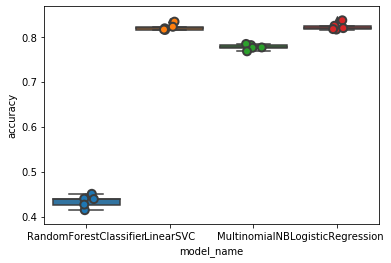

In [19]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [20]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.82126
LogisticRegression        0.82276
MultinomialNB             0.77704
RandomForestClassifier    0.43396
Name: accuracy, dtype: float64

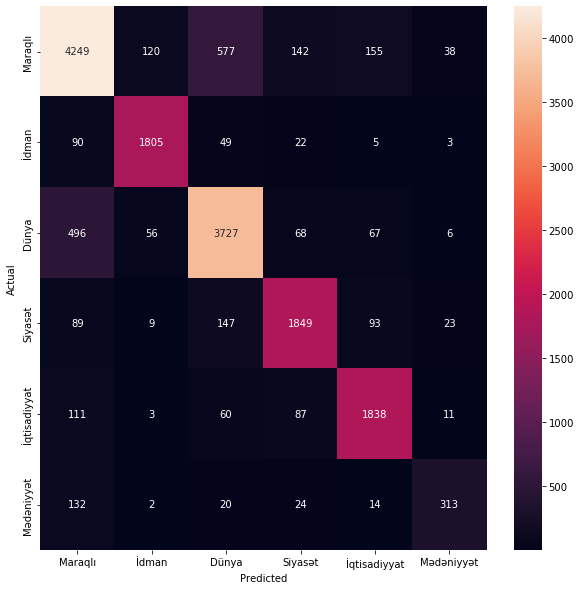

In [21]:
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Category'].unique()))

              precision    recall  f1-score   support

     Maraqlı       0.82      0.80      0.81      5281
       İdman       0.90      0.91      0.91      1974
       Dünya       0.81      0.84      0.83      4420
     Siyasət       0.84      0.84      0.84      2210
İqtisadiyyat       0.85      0.87      0.86      2110
  Mədəniyyət       0.79      0.62      0.70       505

    accuracy                           0.84     16500
   macro avg       0.84      0.81      0.82     16500
weighted avg       0.83      0.84      0.83     16500

